# Count the number of algorithm evaluations each model had

In [1]:
import pandas as pd
import os
from os.path import join

root = './'
classifiers = [x for x in os.listdir(root) if x.startswith('GridSearchCV') and not x.endswith('.tabular')]
for clf in classifiers:
    print(clf)
    count = 0
    for per_dataset in [x for x in os.listdir(root+clf) if not x.startswith('Galaxy') and x.endswith('.tabular')]:
        result_df = pd.read_csv(join(root+clf, per_dataset), sep='\t')
        count += result_df.shape[0]
    print(count)


GridSearchCV-PassiveAggressiveClassifier
7304
GridSearchCV-BernoulliNB
23240
GridSearchCV-AdaBoostClassifier
4648
GridSearchCV-MultinomialNB
3320
GridSearchCV-GradientBoostingClassifier
1254404
GridSearchCV-SGDClassifier
28042200
GridSearchCV-GaussianNB
166
GridSearchCV-KNeighborsClassifier
8010
GridSearchCV-DecisionTreeClassifier
46480
GridSearchCV-ExtraTreesClassifier
183680
GridSearchCV-SVC
228211
GridSearchCV-RandomForestClassifier
184800
GridSearchCV-XGBClassifier
4665287
GridSearchCV-LogisticRegression
53120
GridSearchCV-LinearSVC
26560


In [2]:

clf = 'GridSearchCV-SGDClassifier'
print(clf)
count = 0
for per_dataset in [x for x in os.listdir(root+clf) if not x.startswith('Galaxy') and x.endswith('.tabular')]:
    result_df = pd.read_csv(join(root+clf, per_dataset), sep='\t')
    count += result_df.shape[0]
    error = result_df['mean_test_primary'].value_counts().get(0, 0)
    print("%s\t %d" %(per_dataset, error))
    count -= error
print(count)

GridSearchCV-SGDClassifier
balance-scale.tsv.gz.tabular	 0
waveform-40.tsv.gz.tabular	 0
cloud.tsv.gz.tabular	 0
mfeat-morphological.tsv.gz.tabular	 0
diabetes.tsv.gz.tabular	 0
spambase.tsv.gz.tabular	 0
analcatdata_aids.tsv.gz.tabular	 0
banana.tsv.gz.tabular	 0
solar-flare_2.tsv.gz.tabular	 0
xd6.tsv.gz.tabular	 0
heart-c.tsv.gz.tabular	 0
nursery.tsv.gz.tabular	 0
ann-thyroid.tsv.gz.tabular	 0
clean1.tsv.gz.tabular	 0
prnn_crabs.tsv.gz.tabular	 0
churn.tsv.gz.tabular	 0
agaricus-lepiota.tsv.gz.tabular	 0
analcatdata_happiness.tsv.gz.tabular	 0
house-votes-84.tsv.gz.tabular	 0
breast-cancer.tsv.gz.tabular	 0
mofn-3-7-10.tsv.gz.tabular	 0
cleveland-nominal.tsv.gz.tabular	 0
analcatdata_germangss.tsv.gz.tabular	 0
monk2.tsv.gz.tabular	 0
GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.tsv.gz.tabular	 0
twonorm.tsv.gz.tabular	 0
lupus.tsv.gz.tabular	 0
mfeat-pixel.tsv.gz.tabular	 0
mfeat-factors.tsv.gz.tabular	 0
ecoli.tsv.gz.tabular	 0
glass.tsv.gz.tabular	 0
breast-cancer-wisconsin.tsv.g

In [3]:
pd.read_csv(join(root+clf, 'balance-scale.tsv.gz.tabular'), sep='\t')['mean_test_primary'].value_counts().sort_index()

0.231145       8
0.234430       8
0.239607    2625
0.245738      72
0.246868    1170
0.246914      45
0.247159      45
0.247733    2805
0.247810     225
0.248149       8
0.248404     288
0.248469       8
0.249034       8
0.249292      45
0.249295      72
0.249620      36
0.250531     135
0.250776     270
0.251931       9
0.252910      90
0.253468       8
0.254396       8
0.254830       1
0.255304      45
0.255549     855
0.257895       1
0.264154     144
0.267211       8
0.267922       3
0.268193       1
            ... 
0.784365      19
0.784691       1
0.784836       1
0.785107     441
0.785880       1
0.785952       2
0.786022      11
0.786342       1
0.787200       9
0.788843       1
0.789078     441
0.791693      49
0.792124       1
0.792948       1
0.794763      49
0.795169       1
0.796033       9
0.796132      49
0.797579     110
0.797882      91
0.798259     441
0.798632      49
0.799183       5
0.802405     441
0.802416       1
0.802713      97
0.805117       9
0.807604      

In [4]:
pd.read_csv(root+'penn_galaxy_f1macro_all.tabular', sep='\t')['mean_test_f1_macro']

0       0.520908
1       0.557602
2       0.598294
3       0.548991
4       0.582912
5       0.581498
6       0.585483
7       0.642025
8       0.795164
9       1.000000
10      0.684835
11      0.512924
12      0.567507
13      0.418156
14      0.711619
15      0.813371
16      0.998366
17      0.897524
18      0.699498
19      0.708682
20      0.740141
21      0.575924
22      0.758144
23      0.219537
24      0.546003
25      0.437112
26      0.558889
27      0.858745
28      0.871372
29      0.878071
          ...   
2449    0.393877
2450    0.891643
2451    0.488876
2452    0.560368
2453    0.636653
2454    0.567542
2455    0.782826
2456    0.933442
2457    0.913964
2458    0.715270
2459    0.763651
2460    0.784046
2461    0.545752
2462    0.983621
2463    0.803084
2464    0.558712
2465    0.715293
2466    0.913330
2467    0.978648
2468    0.739703
2469    0.961104
2470    0.532683
2471    0.866615
2472    0.867103
2473    0.981055
2474    0.263920
2475    0.265420
2476    0.9889

# How often is model X better than model Y?

In [5]:
root = './'
dataset_exclude = ['mnist.tsv.gz']

In [6]:
import pandas as pd
import pdb

data = pd.read_csv(root+'penn_galaxy_f1macro_all.tabular', sep='\t')
#data['mean_test_f1_macro'] = data['mean_test_f1_macro'].apply(lambda x: round(x, 3))
data = data[['dataset', 'classifier', 'mean_test_f1_macro']]
data = data[~data['dataset'].isin(dataset_exclude)]
data.head()

,dataset,classifier,mean_test_f1_macro
0,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,KNeighborsClassifier,0.520908
1,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.ts...,KNeighborsClassifier,0.557602
2,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.ts...,KNeighborsClassifier,0.598294
3,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.ts...,KNeighborsClassifier,0.548991
4,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,KNeighborsClassifier,0.582912


In [7]:
from collections import defaultdict
from tqdm import tqdm
import numpy as np
from itertools import combinations
import pdb

model_tourneys = defaultdict(int)
all_models = sorted(data['classifier'].unique())

for dataset, group_dataset in tqdm(data.groupby('dataset')):
    
#     pdb.set_trace()
    group_dataset.loc[:, 'mean_test_f1_macro']= group_dataset['mean_test_f1_macro'].values / group_dataset['mean_test_f1_macro'].max()
    group_dataset = group_dataset.set_index('classifier')['mean_test_f1_macro'].to_dict()

    for (model1, model2) in combinations(group_dataset.keys(), 2):
        if group_dataset[model1] >= group_dataset[model2] + 0.01:
            model_tourneys[(model1, model2)] += 1
        elif group_dataset[model2] >= group_dataset[model1] + 0.01:
            model_tourneys[(model2, model1)] += 1

  0%|          | 0/165 [00:00<?, ?it/s]/Users/guq/miniconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
100%|██████████| 165/165 [00:05<00:00, 27.63it/s]


In [8]:
model_tourneys

defaultdict(int,
            {('XGBClassifier', 'KNeighborsClassifier'): 136,
             ('KNeighborsClassifier', 'AdaBoostClassifier'): 81,
             ('KNeighborsClassifier', 'LinearSVC'): 87,
             ('ExtraTreesClassifier', 'KNeighborsClassifier'): 132,
             ('KNeighborsClassifier', 'LogisticRegression'): 83,
             ('KNeighborsClassifier', 'MultinomialNB'): 134,
             ('GradientBoostingClassifier', 'KNeighborsClassifier'): 126,
             ('RandomForestClassifier', 'KNeighborsClassifier'): 121,
             ('KNeighborsClassifier', 'GaussianNB'): 134,
             ('KNeighborsClassifier', 'BernoulliNB'): 112,
             ('KNeighborsClassifier', 'PassiveAggressiveClassifier'): 102,
             ('XGBClassifier', 'AdaBoostClassifier'): 142,
             ('XGBClassifier', 'LinearSVC'): 139,
             ('XGBClassifier', 'ExtraTreesClassifier'): 71,
             ('XGBClassifier', 'DecisionTreeClassifier'): 138,
             ('XGBClassifier', 'Logisti

In [9]:
from itertools import product

for model1 in all_models:
    print('{}{}W / L'.format(model1,
                               ' ' * (38 - len(model1))))
    print('--------------------')
    for model2 in all_models:
        if model1 == model2:
            continue
        print('\t{}{}{} / {}'.format(model2,
                                     ' ' * (30 - len(model2)),
                                     model_tourneys[(model1, model2)],
                                     model_tourneys[(model2, model1)]))
    print('')

AdaBoostClassifier                    W / L
--------------------
	BernoulliNB                   95 / 41
	DecisionTreeClassifier        46 / 87
	ExtraTreesClassifier          16 / 117
	GaussianNB                    120 / 29
	GradientBoostingClassifier    6 / 128
	KNeighborsClassifier          60 / 81
	LinearSVC                     76 / 56
	LogisticRegression            71 / 62
	MultinomialNB                 123 / 31
	PassiveAggressiveClassifier   82 / 49
	RandomForestClassifier        13 / 123
	SGDClassifier                 53 / 82
	SVC                           23 / 107
	XGBClassifier                 1 / 142

BernoulliNB                           W / L
--------------------
	AdaBoostClassifier            41 / 95
	DecisionTreeClassifier        28 / 119
	ExtraTreesClassifier          15 / 136
	GaussianNB                    94 / 43
	GradientBoostingClassifier    11 / 140
	KNeighborsClassifier          39 / 112
	LinearSVC                     50 / 83
	LogisticRegression            42 / 89
	M

In [10]:
from itertools import product
import numpy as np

model_tourney_matrix = []

for pair in list(product(all_models, all_models)):
    model_tourney_matrix.append(model_tourneys[pair])
    
model_tourney_matrix = np.array(model_tourney_matrix).reshape((15, 15))
all_models = list(np.array(all_models)[np.argsort(model_tourney_matrix.sum(axis=1))[::-1]])
model_tourney_matrix = model_tourney_matrix[:, np.argsort(model_tourney_matrix.sum(axis=1))[::-1]]

In [11]:
from itertools import product
import numpy as np

"""
TODO: This code snippet needs to be run twice (this is the 2nd time it's being run here,
with the above snippet being the first time) so the chart below will display properly.
There's some weird bug going on here that we should dig in to.
"""

model_tourney_matrix = []

for pair in list(product(all_models, all_models)):
    model_tourney_matrix.append(model_tourneys[pair])
    
model_tourney_matrix = np.array(model_tourney_matrix).reshape((15, 15))
all_models = list(np.array(all_models)[np.argsort(model_tourney_matrix.sum(axis=1))[::-1]])
model_tourney_matrix = model_tourney_matrix[:, np.argsort(model_tourney_matrix.sum(axis=1))[::-1]]

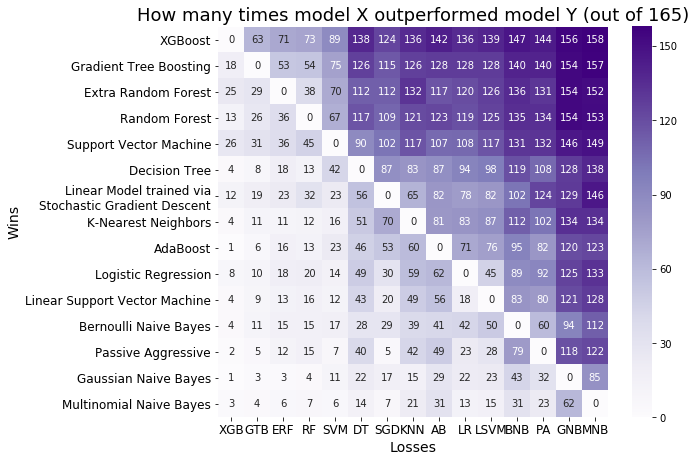

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
model_nice_dict = {
    'AdaBoostClassifier': 'AB',
    'BernoulliNB': 'BNB',
    'LogisticRegression': 'LR',
    'MultinomialNB': 'MNB',
    'PassiveAggressiveClassifier': 'PA',
    'SGDClassifier': 'SGD',
    'GaussianNB': 'GNB',
    'DecisionTreeClassifier': 'DT',
    'ExtraTreesClassifier': 'ERF',
    'RandomForestClassifier': 'RF',
    'GradientBoostingClassifier':'GTB',
    'KNeighborsClassifier': 'KNN',
    'SVC': 'SVM',
    'XGBClassifier': 'XGB',
    'LinearSVC': 'LSVM',
}
model_nice_dict_y = {
    'AdaBoostClassifier': 'AdaBoost',
    'BernoulliNB': 'Bernoulli Naive Bayes',
    'LogisticRegression': 'Logistic Regression',
    'MultinomialNB': 'Multinomial Naive Bayes',
    'PassiveAggressiveClassifier': 'Passive Aggressive',
    'SGDClassifier': 'Linear Model trained via\nStochastic Gradient Descent',
    'GaussianNB': 'Gaussian Naive Bayes',
    'DecisionTreeClassifier': 'Decision Tree',
    'ExtraTreesClassifier': 'Extra Random Forest',
    'RandomForestClassifier': 'Random Forest',
    'GradientBoostingClassifier':'Gradient Tree Boosting',
    'KNeighborsClassifier': 'K-Nearest Neighbors',
    'SVC': 'Support Vector Machine',
    'XGBClassifier': 'XGBoost',
    'LinearSVC': 'Linear Support Vector Machine'
}

model_nice = []
model_nice_y = []
for m in all_models:
    model_nice.append(model_nice_dict[m])
    model_nice_y.append(model_nice_dict_y[m])
    
plt.figure(figsize=(10, 10))
sb.heatmap(model_tourney_matrix, square=True, annot=True, fmt='0.0f', cmap='Purples',
           xticklabels=model_nice, yticklabels=model_nice_y, cbar_kws={'shrink': 0.56})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Losses', fontsize=14)
plt.ylabel('Wins', fontsize=14)
plt.title('How many times model X outperformed model Y (out of 165)', fontsize=18)
h = plt.gcf()
plt.tight_layout()
#plt.show()
h.savefig('./model_outperformance.pdf', bbox_inches='tight')
#plt.savefig('figures/sklearn-model-x-outperform-model-y.pdf', bbox_inches='tight')

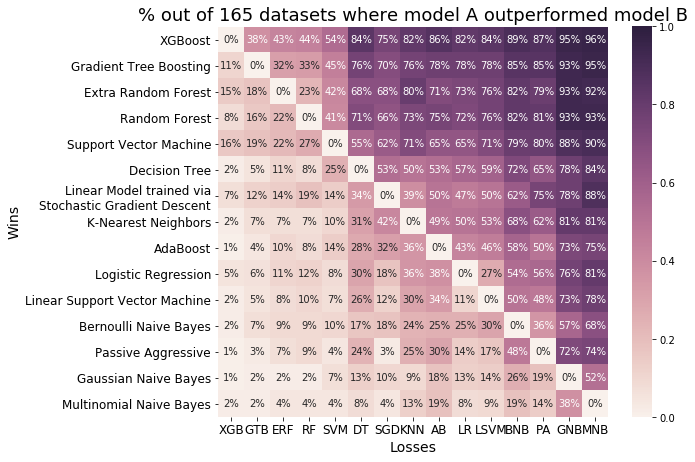

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
model_nice_dict = {
    'AdaBoostClassifier': 'AB',
    'BernoulliNB': 'BNB',
    'LogisticRegression': 'LR',
    'MultinomialNB': 'MNB',
    'PassiveAggressiveClassifier': 'PA',
    'SGDClassifier': 'SGD',
    'GaussianNB': 'GNB',
    'DecisionTreeClassifier': 'DT',
    'ExtraTreesClassifier': 'ERF',
    'RandomForestClassifier': 'RF',
    'GradientBoostingClassifier':'GTB',
    'KNeighborsClassifier': 'KNN',
    'SVC': 'SVM',
    'XGBClassifier': 'XGB',
    'LinearSVC': 'LSVM',
}
model_nice_dict_y = {
    'AdaBoostClassifier': 'AdaBoost',
    'BernoulliNB': 'Bernoulli Naive Bayes',
    'LogisticRegression': 'Logistic Regression',
    'MultinomialNB': 'Multinomial Naive Bayes',
    'PassiveAggressiveClassifier': 'Passive Aggressive',
    'SGDClassifier': 'Linear Model trained via\nStochastic Gradient Descent',
    'GaussianNB': 'Gaussian Naive Bayes',
    'DecisionTreeClassifier': 'Decision Tree',
    'ExtraTreesClassifier': 'Extra Random Forest',
    'RandomForestClassifier': 'Random Forest',
    'GradientBoostingClassifier':'Gradient Tree Boosting',
    'KNeighborsClassifier': 'K-Nearest Neighbors',
    'SVC': 'Support Vector Machine',
    'XGBClassifier': 'XGBoost',
    'LinearSVC': 'Linear Support Vector Machine'
}

model_nice = []
model_nice_y = []
for m in all_models:
    model_nice.append(model_nice_dict[m])
    model_nice_y.append(model_nice_dict_y[m])
    
plt.figure(figsize=(10, 10))
sb.heatmap(np.round(model_tourney_matrix / 165., 2), fmt='0.0%',
           cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
           square=True, annot=True, vmin=0., vmax=1.0,
           xticklabels=model_nice, yticklabels=model_nice_y, cbar=True,
           cbar_kws={'shrink': 0.56})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Losses', fontsize=14)
plt.ylabel('Wins', fontsize=14)
plt.title('% out of 165 datasets where model A outperformed model B', fontsize=18)
h = plt.gcf()
plt.tight_layout()
#h.savefig('figs/model_outperformance.pdf', bbox_inches='tight')
#h.savefig('./model_outperformance.pdf', bbox_inches='tight')
#plt.savefig('figures/sklearn-model-x-outperform-model-y.pdf', bbox_inches='tight')


# Comparison of tuned to un-tuned results

In [14]:
import numpy as np
from tqdm import tqdm
import pandas as pd

In [15]:
root = "./"
best_df = pd.read_csv(root+"penn_galaxy_f1macro_all.tabular", sep='\t')
best_df

,classifier,dataset,params,mean_test_f1_macro,std_test_f1_macro,mean_test_accuracy,mean_test_balanced_accuracy
0,KNeighborsClassifier,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,"{u'estimator__n_neighbors': 4, u'estimator__we...",0.520908,0.055013,0.521875,0.000000
1,KNeighborsClassifier,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.ts...,"{u'estimator__n_neighbors': 20, u'estimator__w...",0.557602,0.046337,0.558125,0.000000
2,KNeighborsClassifier,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.ts...,"{u'estimator__n_neighbors': 16, u'estimator__w...",0.598294,0.030299,0.599375,0.000000
3,KNeighborsClassifier,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.ts...,"{u'estimator__n_neighbors': 24, u'estimator__w...",0.548991,0.030707,0.550000,0.000000
4,KNeighborsClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,"{u'estimator__n_neighbors': 15, u'estimator__w...",0.582912,0.027305,0.587500,0.000000
5,KNeighborsClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,"{u'estimator__n_neighbors': 16, u'estimator__w...",0.581498,0.029481,0.583750,0.000000
6,KNeighborsClassifier,Hill_Valley_with_noise.tsv.gz,"{u'estimator__n_neighbors': 1, u'estimator__we...",0.585483,0.043137,0.586634,0.000000
7,KNeighborsClassifier,Hill_Valley_without_noise.tsv.gz,"{u'estimator__n_neighbors': 1, u'estimator__we...",0.642025,0.055009,0.642739,0.000000
8,KNeighborsClassifier,adult.tsv.gz,"{u'estimator__n_neighbors': 12, u'estimator__w...",0.795164,0.007308,0.854367,0.000000
9,KNeighborsClassifier,agaricus-lepiota.tsv.gz,"{u'estimator__n_neighbors': 1, u'estimator__we...",1.000000,0.000000,1.000000,1.000000


In [16]:
default_df = pd.read_csv(root+"penn_galaxy_f1macro_all_default.tabular", sep='\t')
default_df

,classifier,dataset,params,mean_test_f1_macro,std_test_f1_macro,mean_test_accuracy,mean_test_balanced_accuracy
0,SGDClassifier,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,{'estimator__random_state': 324089},0.493865,0.030194,0.501875,0.501875
1,SGDClassifier,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.474544,0.038504,0.500000,0.500000
2,SGDClassifier,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.487158,0.032547,0.498750,0.498750
3,SGDClassifier,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.479270,0.019436,0.495000,0.495000
4,SGDClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.491502,0.059394,0.510625,0.510625
5,SGDClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.485081,0.026654,0.500000,0.500000
6,SGDClassifier,Hill_Valley_with_noise.tsv.gz,{'estimator__random_state': 324089},0.599862,0.116618,0.609736,0.609736
7,SGDClassifier,Hill_Valley_without_noise.tsv.gz,{'estimator__random_state': 324089},0.588760,0.150065,0.591584,0.591727
8,SGDClassifier,adult.tsv.gz,{'estimator__random_state': 324089},0.688821,0.026392,0.776565,0.687838
9,SGDClassifier,agaricus-lepiota.tsv.gz,{'estimator__random_state': 324089},0.947530,0.013120,0.947698,0.947268


In [17]:
merged_df= default_df.merge(best_df,
                            on=['classifier', 'dataset'],
                            suffixes=['_default', '_best'])
merged_df

,classifier,dataset,params_default,mean_test_f1_macro_default,std_test_f1_macro_default,mean_test_accuracy_default,mean_test_balanced_accuracy_default,params_best,mean_test_f1_macro_best,std_test_f1_macro_best,mean_test_accuracy_best,mean_test_balanced_accuracy_best
0,SGDClassifier,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,{'estimator__random_state': 324089},0.493865,0.030194,0.501875,0.501875,"{u'estimator__power_t': 0.5, u'estimator__lear...",0.524923,0.030738,0.526875,0.000000
1,SGDClassifier,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.474544,0.038504,0.500000,0.500000,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.521188,0.023627,0.522500,0.000000
2,SGDClassifier,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.487158,0.032547,0.498750,0.498750,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.529401,0.031198,0.546250,0.000000
3,SGDClassifier,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.479270,0.019436,0.495000,0.495000,"{u'estimator__power_t': 0.1, u'estimator__lear...",0.528587,0.030450,0.530000,0.000000
4,SGDClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.491502,0.059394,0.510625,0.510625,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.527106,0.049470,0.527500,0.000000
5,SGDClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.485081,0.026654,0.500000,0.500000,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.530713,0.032722,0.531875,0.000000
6,SGDClassifier,Hill_Valley_with_noise.tsv.gz,{'estimator__random_state': 324089},0.599862,0.116618,0.609736,0.609736,"{u'estimator__power_t': 0.5, u'estimator__lear...",0.754977,0.098517,0.757426,0.000000
7,SGDClassifier,Hill_Valley_without_noise.tsv.gz,{'estimator__random_state': 324089},0.588760,0.150065,0.591584,0.591727,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.700331,0.087819,0.708746,0.049917
8,SGDClassifier,adult.tsv.gz,{'estimator__random_state': 324089},0.688821,0.026392,0.776565,0.687838,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.714857,0.011380,0.795463,0.000000
9,SGDClassifier,agaricus-lepiota.tsv.gz,{'estimator__random_state': 324089},0.947530,0.013120,0.947698,0.947268,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.979961,0.006301,0.979988,0.000000


In [18]:
merged_df['mean_test_f1_macro_scaled'] = merged_df['mean_test_f1_macro_best'] - merged_df['mean_test_f1_macro_default']
merged_df

,classifier,dataset,params_default,mean_test_f1_macro_default,std_test_f1_macro_default,mean_test_accuracy_default,mean_test_balanced_accuracy_default,params_best,mean_test_f1_macro_best,std_test_f1_macro_best,mean_test_accuracy_best,mean_test_balanced_accuracy_best,mean_test_f1_macro_scaled
0,SGDClassifier,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,{'estimator__random_state': 324089},0.493865,0.030194,0.501875,0.501875,"{u'estimator__power_t': 0.5, u'estimator__lear...",0.524923,0.030738,0.526875,0.000000,0.031058
1,SGDClassifier,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.474544,0.038504,0.500000,0.500000,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.521188,0.023627,0.522500,0.000000,0.046644
2,SGDClassifier,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.487158,0.032547,0.498750,0.498750,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.529401,0.031198,0.546250,0.000000,0.042243
3,SGDClassifier,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.479270,0.019436,0.495000,0.495000,"{u'estimator__power_t': 0.1, u'estimator__lear...",0.528587,0.030450,0.530000,0.000000,0.049318
4,SGDClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.491502,0.059394,0.510625,0.510625,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.527106,0.049470,0.527500,0.000000,0.035604
5,SGDClassifier,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.485081,0.026654,0.500000,0.500000,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.530713,0.032722,0.531875,0.000000,0.045632
6,SGDClassifier,Hill_Valley_with_noise.tsv.gz,{'estimator__random_state': 324089},0.599862,0.116618,0.609736,0.609736,"{u'estimator__power_t': 0.5, u'estimator__lear...",0.754977,0.098517,0.757426,0.000000,0.155116
7,SGDClassifier,Hill_Valley_without_noise.tsv.gz,{'estimator__random_state': 324089},0.588760,0.150065,0.591584,0.591727,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.700331,0.087819,0.708746,0.049917,0.111571
8,SGDClassifier,adult.tsv.gz,{'estimator__random_state': 324089},0.688821,0.026392,0.776565,0.687838,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.714857,0.011380,0.795463,0.000000,0.026036
9,SGDClassifier,agaricus-lepiota.tsv.gz,{'estimator__random_state': 324089},0.947530,0.013120,0.947698,0.947268,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.979961,0.006301,0.979988,0.000000,0.032430


In [19]:
model_names_dict = {
    'AdaBoostClassifier': 'AdaBoost',
    'BernoulliNB': 'Bernoulli Naive Bayes',
    'LogisticRegression': 'Logistic Regression',
    'MultinomialNB': 'Multinomial Naive Bayes',
    'PassiveAggressiveClassifier': 'Passive Aggressive',
    'SGDClassifier': 'Linear Model trained via\nStochastic Gradient Descent',
    'GaussianNB': 'Gaussian Naive Bayes',
    'DecisionTreeClassifier': 'Decision Tree',
    'ExtraTreesClassifier': 'Extra Random Forest',
    'RandomForestClassifier': 'Random Forest',
    'GradientBoostingClassifier':'Gradient Tree Boosting',
    'KNeighborsClassifier': 'K-Nearest Neighbors',
    'SVC': 'Support Vector Machine',
    'XGBClassifier': 'XGBoost',
    'LinearSVC': 'Linear Support Vector Machine'
}

merged_df['classifier'] = merged_df['classifier'].apply(lambda x: model_names_dict[x])
merged_df

,classifier,dataset,params_default,mean_test_f1_macro_default,std_test_f1_macro_default,mean_test_accuracy_default,mean_test_balanced_accuracy_default,params_best,mean_test_f1_macro_best,std_test_f1_macro_best,mean_test_accuracy_best,mean_test_balanced_accuracy_best,mean_test_f1_macro_scaled
0,Linear Model trained via\nStochastic Gradient ...,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,{'estimator__random_state': 324089},0.493865,0.030194,0.501875,0.501875,"{u'estimator__power_t': 0.5, u'estimator__lear...",0.524923,0.030738,0.526875,0.000000,0.031058
1,Linear Model trained via\nStochastic Gradient ...,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.474544,0.038504,0.500000,0.500000,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.521188,0.023627,0.522500,0.000000,0.046644
2,Linear Model trained via\nStochastic Gradient ...,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.487158,0.032547,0.498750,0.498750,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.529401,0.031198,0.546250,0.000000,0.042243
3,Linear Model trained via\nStochastic Gradient ...,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.ts...,{'estimator__random_state': 324089},0.479270,0.019436,0.495000,0.495000,"{u'estimator__power_t': 0.1, u'estimator__lear...",0.528587,0.030450,0.530000,0.000000,0.049318
4,Linear Model trained via\nStochastic Gradient ...,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.491502,0.059394,0.510625,0.510625,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.527106,0.049470,0.527500,0.000000,0.035604
5,Linear Model trained via\nStochastic Gradient ...,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,{'estimator__random_state': 324089},0.485081,0.026654,0.500000,0.500000,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.530713,0.032722,0.531875,0.000000,0.045632
6,Linear Model trained via\nStochastic Gradient ...,Hill_Valley_with_noise.tsv.gz,{'estimator__random_state': 324089},0.599862,0.116618,0.609736,0.609736,"{u'estimator__power_t': 0.5, u'estimator__lear...",0.754977,0.098517,0.757426,0.000000,0.155116
7,Linear Model trained via\nStochastic Gradient ...,Hill_Valley_without_noise.tsv.gz,{'estimator__random_state': 324089},0.588760,0.150065,0.591584,0.591727,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.700331,0.087819,0.708746,0.049917,0.111571
8,Linear Model trained via\nStochastic Gradient ...,adult.tsv.gz,{'estimator__random_state': 324089},0.688821,0.026392,0.776565,0.687838,"{u'estimator__power_t': 1.0, u'estimator__lear...",0.714857,0.011380,0.795463,0.000000,0.026036
9,Linear Model trained via\nStochastic Gradient ...,agaricus-lepiota.tsv.gz,{'estimator__random_state': 324089},0.947530,0.013120,0.947698,0.947268,"{u'estimator__power_t': 0.0, u'estimator__lear...",0.979961,0.006301,0.979988,0.000000,0.032430


(0.0, 0.5)

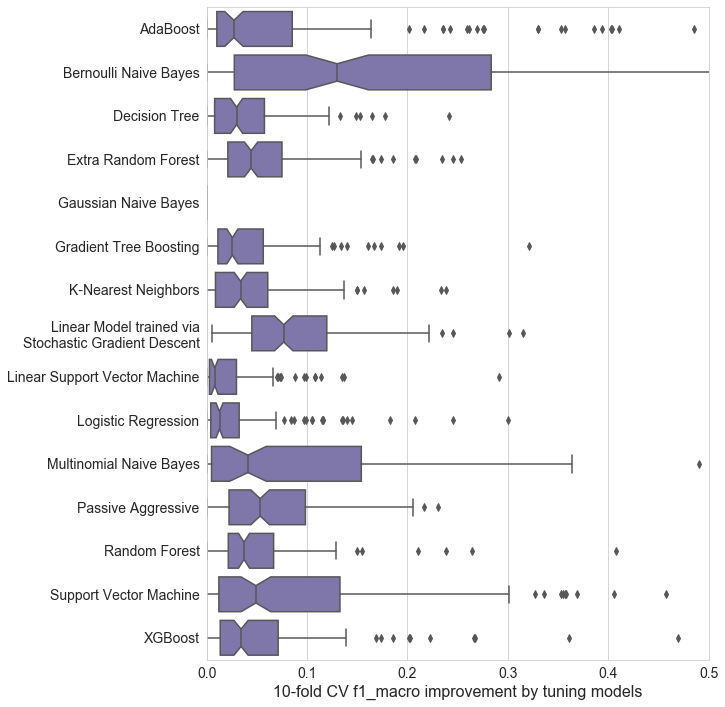

In [20]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_style('whitegrid')

plt.figure(figsize=(9, 12))
sb.boxplot(data=merged_df.sort_values('classifier'),
           y='classifier', x='mean_test_f1_macro_scaled', notch=True,
           palette=[sb.color_palette('Purples', n_colors=2)[1]])
plt.ylabel('')
plt.xlabel('10-fold CV f1_macro improvement by tuning models', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0., 0.5)
#plt.title('Tuning machine learning model parameters almost always improves\nmodel performance', fontsize=22)
#plt.savefig('./tuned_untuned_accuracy_boxplot.pdf', bbox_inches='tight')
